## 1. Write a program to construct and evaluate the Newton polynomial
of degree ≤ N that
passes through (xk , yk ) = (xk , f (xk )) for k = 0, 1, . . . , N $$
\begin{aligned}
P(x)= & d_{0,0}+d_{1,1}\left(x-x_0\right)+d_{2,2}\left(x-x_0\right)\left(x-x_1\right) \\
& +\cdots d_{N, N}\left(x-x_0\right)\left(x-x_1\right) \cdots\left(x-x_{N-1}\right)
\end{aligned}
$$
where
$$
d_{k, 0}=y_k \quad \text { and } \quad d_{k, j}=\frac{d_{k, j-1}-d_{k-1, j-1}}{x_k-x_{k-j}}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def newton_polynomial(x_values, y_values, x):
    """
    Construct and evaluate the Newton polynomial.

    Parameters:
    - x_values: List of x coordinates (x0, x1, ..., xn)
    - y_values: List of corresponding y coordinates (y0, y1, ..., yn)
    - x: The value at which to evaluate the polynomial

    Returns:
    - The value of the Newton polynomial at x
    """

    n = len(x_values)  # Degree of the polynomial
    d = [[0] * n for _ in range(n)]  # Initialize the divided difference table

    # Initialize the divided differences using the given y values
    for i in range(n):
        d[i][0] = y_values[i]

    # Populate the divided difference table
    for j in range(1, n):
        for i in range(n - j):
            d[i][j] = (d[i + 1][j - 1] - d[i][j - 1]) / (x_values[i + j] - x_values[i])

    # Construct the Newton polynomial
    result = d[0][0]
    term = 1

    for j in range(1, n):
        term *= (x - x_values[j - 1])
        result += d[0][j] * term

    return result


In [3]:
# Example usage:
x_values = [1, 2, 3, 4]  # Replace with your x values
y_values = [2, 3, 5, 10]  # Replace with your corresponding y values
x_to_evaluate = 2.5  # Replace with the x value where you want to evaluate the polynomial

result = newton_polynomial(x_values, y_values, x_to_evaluate)
print(f"P({x_to_evaluate}) =", result)


P(2.5) = 3.75


## 2. Consider 
y = f (x) = cos(x) over [0.0, 1.2]. 
Use 4-, 6-, and 12-nodes (at equal intervals),
to construct Newton interpolating polynomials, respectively. Compare the approximation
with the exact curve.

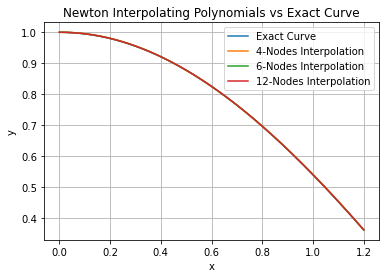

In [4]:
# Define the exact function
def exact_function(x):
    return np.cos(x)

# Generate nodes at equal intervals
def generate_nodes(start, end, num_nodes):
    return np.linspace(start, end, num_nodes)

# Generate x values for plotting the exact curve
x_exact = np.linspace(0.0, 1.2, 1000)
y_exact = exact_function(x_exact)

# Number of nodes for interpolation
node_counts = [4, 6, 12]

# Plot the exact curve
plt.plot(x_exact, y_exact, label='Exact Curve')

# Plot Newton interpolating polynomials for different node counts
for nodes in node_counts:
    x_nodes = generate_nodes(0.0, 1.2, nodes)
    y_nodes = exact_function(x_nodes)
    y_interpolated = [newton_polynomial(x_nodes, y_nodes, x) for x in x_exact]

    plt.plot(x_exact, y_interpolated, label=f'{nodes}-Nodes Interpolation')

# Set plot properties
plt.title('Newton Interpolating Polynomials vs Exact Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## 3. Write a program to construct
the least-squares line y = Ax + B that fits the N data points (x1 , y1 ), . . . , (xN , yN ).


(a) The following data give the distances of the nine planets from the sun and their
sidereal periods in days.
$$
\begin{array}{|l|c|c|}
\hline \text { Planet } & \begin{array}{c}
\text { Distance from } \\
\text { sun }\left(\mathrm{km} \times 10^6\right)
\end{array} & \begin{array}{c}
\text { Sidereal period } \\
(\text { days })
\end{array} \\
\hline \text { Mercury } & 57.59 & 87.99 \\
\text { Venus } & 108.11 & 224.70 \\
\text { Earth } & 149.57 & 365.26 \\
\text { Mars } & 227.84 & 686.98 \\
\text { Jupiter } & 778.14 & 4332.4 \\
\text { Saturn } & 1427.0 & 10759 \\
\text { Uranus } & 2870.3 & 30684 \\
\text { Neptune } & 4499.9 & 60188 \\
\text { Pluto } & 5909.0 & 90710 \\
\hline
\end{array}
$$
Find the power fit of the form $y = Cx^{3/2}$ for (i) the first four planets and (ii) all
nine planets.

In [5]:
# Given data for the distances and sidereal periods of planets
data = {
    'Mercury': (57.59, 87.99),
    'Venus': (108.11, 224.70),
    'Earth': (149.57, 365.26),
    'Mars': (227.84, 686.98),
    'Jupiter': (778.14, 4332.4),
    'Saturn': (1427.0, 10759),
    'Uranus': (2870.3, 30684),
    'Neptune': (4499.9, 60188),
    'Pluto': (5909.0, 90710)
}


In [6]:
# Function to perform Gaussian elimination
def gaussian_elimination(A, b):
    n = len(b)
    
    # Augment the matrix A with the vector b
    augmented_matrix = np.column_stack([A, b])

    # Forward elimination
    for i in range(n):
        pivot_row = augmented_matrix[i, :]
        for j in range(i + 1, n):
            factor = augmented_matrix[j, i] / pivot_row[i]
            augmented_matrix[j, :] -= factor * pivot_row

    # Backward substitution
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i, -1] / augmented_matrix[i, i]
        for j in range(i - 1, -1, -1):
            augmented_matrix[j, -1] -= augmented_matrix[j, i] * x[i]

    return x

In [7]:
# Function to perform the power fit
def power_fit(x_values, y_values):
    n = len(x_values)
    x_prime = np.log(x_values)
    y_prime = np.log(y_values)

    sum_x_prime = np.sum(x_prime)
    sum_y_prime = np.sum(y_prime)
    sum_x_prime_squared = np.sum(x_prime**2)
    sum_x_prime_y_prime = np.sum(x_prime * y_prime)

    A = np.array([[n, sum_x_prime], [sum_x_prime, sum_x_prime_squared]])
    b = np.array([sum_y_prime, sum_x_prime_y_prime])

    # Solve the system using Gaussian elimination
    a_coeff, b_coeff = gaussian_elimination(A, b)

    C = np.exp(a_coeff)
    return C

(i) Power fit for the first four planets: C = 0.2059246530027598
(ii) Power fit for all nine planets: C = 0.20125843717484498


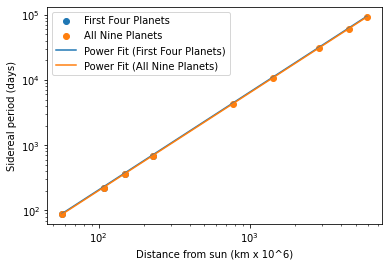

In [8]:
# Extract data for the first four planets
x_values_first_four = np.array([data[planet][0] for planet in list(data.keys())[:4]])
y_values_first_four = np.array([data[planet][1] for planet in list(data.keys())[:4]])

# Extract data for all nine planets
x_values_all_nine = np.array([data[planet][0] for planet in data.keys()])
y_values_all_nine = np.array([data[planet][1] for planet in data.keys()])

# Perform power fit for the first four planets
C_first_four = power_fit(x_values_first_four, y_values_first_four)

# Perform power fit for all nine planets
C_all_nine = power_fit(x_values_all_nine, y_values_all_nine)

# Print the coefficients
print(f'(i) Power fit for the first four planets: C = {C_first_four}')
print(f'(ii) Power fit for all nine planets: C = {C_all_nine}')

# Plot the data and the power fit curves
plt.scatter(x_values_first_four, y_values_first_four, label='First Four Planets')
plt.scatter(x_values_all_nine, y_values_all_nine, label='All Nine Planets')

x_range = np.linspace(min(x_values_all_nine), max(x_values_all_nine), 100)
plt.plot(x_range, C_first_four * x_range**1.5, label='Power Fit (First Four Planets)')
plt.plot(x_range, C_all_nine * x_range**1.5, label='Power Fit (All Nine Planets)')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Distance from sun (km x 10^6)')
plt.ylabel('Sidereal period (days)')
plt.legend()
plt.show()

## Logistic population growth. 
When the population P (t) is bounded by the limiting value L, it follows a logistic curve and has the form 

$P(t)=\frac{L}{1+C e^{A t}}$

Find A and C by fitting the following data with L = 1000.
(0, 200), (1, 400), (2, 650), (3, 850), (4, 950)

In [9]:
# Given data
data = {
    0: 200,
    1: 400,
    2: 650,
    3: 850,
    4: 950
}

# Given limiting value
L = 1000

In [10]:
# Transform the data
X_values = np.array(list(data.keys()))
Y_values = np.log(L / np.array(list(data.values())) - 1)

# Function to perform linear fit
def linear_fit(X_values, Y_values):
    n = len(X_values)
    
    sum_X = np.sum(X_values)
    sum_Y = np.sum(Y_values)
    sum_X_squared = np.sum(X_values**2)
    sum_XY = np.sum(X_values * Y_values)

    A = np.array([[n, sum_X], [sum_X, sum_X_squared]])
    B = np.array([sum_Y, sum_XY])

    # Solve the system using Gaussian elimination
    a_coeff, b_coeff = gaussian_elimination(A, B)

    return a_coeff, b_coeff

A = 1.4590426140672434, B = -1.0801532844068933


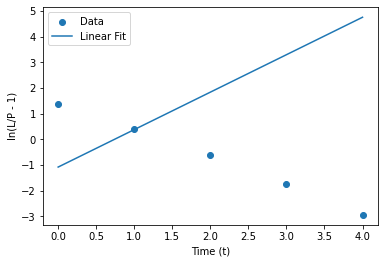

In [11]:
# Perform linear fit
A_coeff, B_coeff = linear_fit(X_values, Y_values)

# Extract A and B from the coefficients
A = A_coeff
B = B_coeff

# Print the coefficients
print(f'A = {A}, B = {B}')

# Plot the data and the linear fit
plt.scatter(X_values, Y_values, label='Data')
plt.plot(X_values, A * X_values + B, label='Linear Fit')

plt.xlabel('Time (t)')
plt.ylabel('ln(L/P - 1)')
plt.legend()
plt.show()
